In [3]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open('connectives.json', 'rb') as f:
     connectives = json.load(f)

connectives

{'Comparison': {'although': 16,
  'as': 2,
  'as though': 3,
  'but': 263,
  'by comparison': 1,
  'however': 49,
  'if': 1,
  'in fact': 1,
  'indeed': 1,
  'much as': 1,
  'nevertheless': 1,
  'nonetheless': 5,
  'on the other hand': 1,
  'similarly': 2,
  'still': 8,
  'then': 1,
  'though': 12,
  'while': 22,
  'yet': 12},
 'Comparison.Concession': {'although': 1,
  'but': 2,
  'however': 5,
  'if': 1,
  'still': 1,
  'though': 6,
  'while': 1},
 'Comparison.Concession.Contra-expectation': {'although': 21,
  'and': 1,
  'as': 1,
  'as if': 4,
  'but': 496,
  'however': 70,
  'if': 7,
  'in the end': 1,
  'meanwhile': 1,
  'nevertheless': 19,
  'nonetheless': 17,
  'regardless': 2,
  'still': 80,
  'then': 1,
  'though': 45,
  'when': 1,
  'while': 3,
  'yet': 34},
 'Comparison.Concession.Expectation': {'after': 3,
  'although': 132,
  'as': 2,
  'but': 12,
  'however': 2,
  'if': 38,
  'much as': 2,
  'still': 2,
  'though': 105,
  'when': 12,
  'while': 82},
 'Comparison.Contrast'

In [5]:
all_lex = list(set(sum([list(connectives[x].keys()) for x in connectives], [])))
all_lex = [a.lower() for a in all_lex]
all_lex

['because',
 'and',
 'overall',
 'ultimately',
 'if and when',
 'however',
 'consequently',
 'accordingly',
 'as a result',
 'in other words',
 'rather',
 'on the contrary',
 'earlier',
 'as',
 'later',
 'since',
 'plus',
 'nor',
 'further',
 'till',
 'as an alternative',
 'regardless',
 'for instance',
 'before and after',
 'similarly',
 'in turn',
 'for example',
 'instead',
 'except',
 'now that',
 'otherwise',
 'thereafter',
 'next',
 'so that',
 'unless',
 'thereby',
 'specifically',
 'lest',
 'on the one hand on the other hand',
 'additionally',
 'for',
 'much as',
 'in the end',
 'in contrast',
 'although',
 'whereas',
 'thus',
 'once',
 'in addition',
 'separately',
 'hence',
 'also',
 'nevertheless',
 'as soon as',
 'if',
 'conversely',
 'still',
 'furthermore',
 'afterward',
 'as long as',
 'therefore',
 'insofar as',
 'moreover',
 'so',
 'finally',
 'when and if',
 'simultaneously',
 'as well',
 'by contrast',
 'meantime',
 'in fact',
 'and',
 'on the other hand',
 'else',
 

In [6]:
most_common_connectives={x:max(connectives[x], key=connectives[x].get) for x in connectives}
most_common_connectives

{'Comparison': 'but',
 'Comparison.Concession': 'though',
 'Comparison.Concession.Contra-expectation': 'but',
 'Comparison.Concession.Expectation': 'although',
 'Comparison.Contrast': 'but',
 'Comparison.Contrast.Juxtaposition': 'but',
 'Comparison.Contrast.Opposition': 'but',
 'Comparison.Pragmatic concession': 'but',
 'Comparison.Pragmatic contrast': 'but',
 'Contingency': 'when',
 'Contingency.Cause.Reason': 'because',
 'Contingency.Cause.Result': 'so',
 'Contingency.Condition': 'if',
 'Contingency.Condition.Factual past': 'if',
 'Contingency.Condition.Factual present': 'if',
 'Contingency.Condition.General': 'if',
 'Contingency.Condition.Hypothetical': 'if',
 'Contingency.Condition.Unreal past': 'if',
 'Contingency.Condition.Unreal present': 'if',
 'Contingency.Pragmatic cause.Justification': 'as',
 'Contingency.Pragmatic condition.Implicit assertion': 'if',
 'Contingency.Pragmatic condition.Relevance': 'if',
 'Expansion': 'as if',
 'Expansion.Alternative': 'or',
 'Expansion.Altern

# Read all the data

In [25]:
data = ''
questions = {}
answers = {}
for root, dirs, files in os.walk("../../old-askparents-data/"):
    for file in files:
        if (file.endswith(".txt") and not file.endswith(".conf") and not file.startswith("stats")):
            with open(os.path.join(root,file)) as f:
                this_files_text = f.read().lower().replace('<br>', ' ')
                data += this_files_text          
                if "context" in file:
                    questions[root.split('/')[-1]] = this_files_text.split()
                else:
                    if answers.get(root.split('/')[-1]):
                        answers[root.split('/')[-1]] += this_files_text
                    else:
                        answers[root.split('/')[-1]] = this_files_text
    
print(data[:500])

which age did you create a themed bedroom for your kid?  i really really want to create a themed bedroom for mybaby girl for her 2 birthday. but i am thinking maby its to soon? what do you think?

love bieuwk

edit:thinking of mild jungle theme because she really really loves animals... every day for alhet sleeps(3 icl night) she wants to do the world animal atlas... she is 1,5 abd can already point like a dozenor so animals of you ask :d alsowe go to the zoo a lot againbecause she just lights u


In [16]:
mcc = set(most_common_connectives.values())

mcc_counts = {x:data.count(x) for x in mcc}
for w in sorted(mcc_counts, key=mcc_counts.get, reverse=True):
    print(w, mcc_counts[w])

or 11627
and 10081
as 7856
so 6694
if 3541
but 2621
when 1513
because 748
though 463
after 410
before 321
unless 98
instead 74
except 43
although 40
for example 23
as if 22
in fact 14
before and after 3
in other words 2
in short 2
indeed 2


In [17]:
counts_all_lex = {x:data.count(x) for x in all_lex}

for w in sorted(counts_all_lex, key=counts_all_lex.get, reverse=True):
    print(w, counts_all_lex[w])

or 11627
and 10081
as 7856
so 6694
for 4460
if 3541
but 2621
when 1513
because 748
also 682
then 594
though 463
till 458
still 436
after 410
nor 391
while 334
before 321
once 309
until 260
since 237
else 187
later 121
next 120
yet 119
as well 114
however 110
now that 105
unless 98
rather 86
as long as 77
instead 74
so that 49
plus 45
except 43
although 40
otherwise 36
finally 36
earlier 33
much as 33
as soon as 31
lest 27
for example 23
specifically 22
as if 22
overall 18
regardless 18
further 15
besides 15
in the end 14
in fact 14
ultimately 13
afterward 11
therefore 8
on the other hand 8
in particular 8
as though 8
similarly 7
whereas 6
thus 6
in addition 5
meanwhile 5
as a result 4
meantime 4
by then 4
before and after 3
furthermore 3
alternatively 3
if and when 2
in other words 2
for instance 2
additionally 2
in contrast 2
separately 2
moreover 2
in sum 2
in short 2
indeed 2
consequently 1
accordingly 1
thereafter 1
thereby 1
hence 1
nevertheless 1
simultaneously 1
previously 1
non

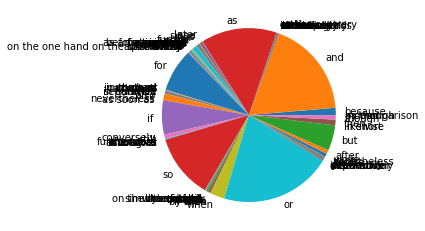

In [18]:
plt.pie(counts_all_lex.values(), labels=counts_all_lex.keys())
plt.show()

# Analysing the questions

Number of questions: 476
Historgram of question length (words):
Max question length (words): d1rqr8 1687
Min question length (words): c2i5eh 8
Median question length (words): 138.0


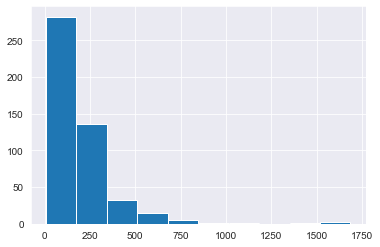

In [28]:
ques_length = {text_id:len(ques) for text_id, ques in questions.items()}
print("Number of questions:", len(questions))
print("Historgram of question length (words):")
plt.hist(ques_length.values())

print("Max question length (words):", max(ques_length, key=ques_length.get), max(ques_length.values()))
print("Min question length (words):", min(ques_length, key=ques_length.get), min(ques_length.values()))
print("Median question length (words):", np.median(list(ques_length.values())))

In [10]:
sum(list(questions.values()), []).count('or')

500

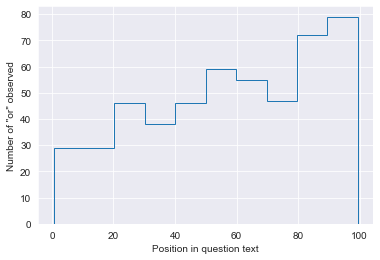

In [29]:
# Find positions of all ors in each question, normalized by 100 for comparison. Each list is concatenated to make a big list.
or_positions = {ques_key: [i*(100/len(questions[ques_key])) for i,x in enumerate(questions[ques_key]) if x=='or'] for ques_key in questions.keys()}
or_positions_summed = sum([[i*(100/len(questions[ques_key])) for i,x in enumerate(questions[ques_key]) if x=='or'] for ques_key in questions.keys()], [])
plt.hist(or_positions_summed, histtype='step')
plt.xlabel('Position in question text')
plt.ylabel('Number of "or" observed')
plt.savefig('or.png', dpi=600)

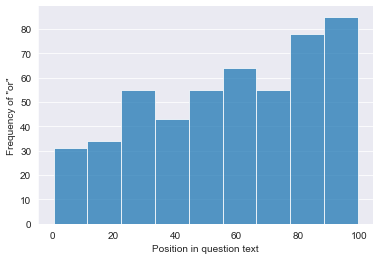

In [30]:
import seaborn as sns
sns.set_style("darkgrid")

fig = sns.distplot(or_positions_summed, kde=False, hist_kws={'alpha':0.75})
fig.set(xlabel='Position in question text', ylabel='Frequency of "or"')
sns.despine()
fig.xaxis.grid(False)
plt.xticks([0,20,40,60,80,100])
plt.savefig('or.png', dpi=600)

(array([223., 283., 310., 276., 289., 295., 299., 272., 276., 186.]),
 array([ 0.21505376, 10.16129032, 20.10752688, 30.05376344, 40.        ,
        49.94623656, 59.89247312, 69.83870968, 79.78494624, 89.7311828 ,
        99.67741935]),
 <a list of 10 Patch objects>)

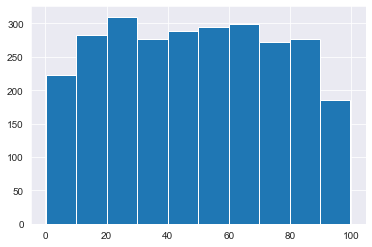

In [13]:
and_positions_summed = sum([[i*(100/len(questions[ques_key])) for i,x in enumerate(questions[ques_key]) if x=='and'] for ques_key in questions.keys()], [])
plt.hist(and_positions_summed)

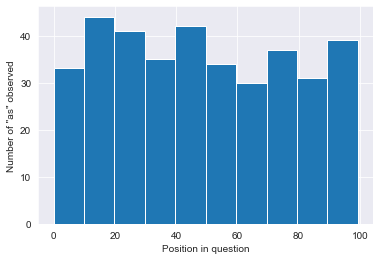

In [14]:
as_positions_summed = sum([[i*(100/len(questions[ques_key])) for i,x in enumerate(questions[ques_key]) if x=='as'] for ques_key in questions.keys()], [])
plt.hist(as_positions_summed)
plt.xlabel('Position in question')
plt.ylabel('Number of "as" observed')
plt.savefig('as.png', dpi=600)

(array([53., 51., 53., 50., 45., 70., 59., 61., 62., 58.]),
 array([ 0.        ,  9.9378882 , 19.8757764 , 29.8136646 , 39.7515528 ,
        49.68944099, 59.62732919, 69.56521739, 79.50310559, 89.44099379,
        99.37888199]),
 <a list of 10 Patch objects>)

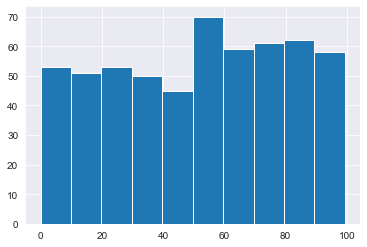

In [15]:
so_positions_summed = sum([[i*(100/len(questions[ques_key])) for i,x in enumerate(questions[ques_key]) if x=='so'] for ques_key in questions.keys()], [])
plt.hist(so_positions_summed)

(array([24., 28., 40., 38., 39., 46., 50., 56., 71., 60.]),
 array([ 0.        ,  9.95464853, 19.90929705, 29.86394558, 39.8185941 ,
        49.77324263, 59.72789116, 69.68253968, 79.63718821, 89.59183673,
        99.54648526]),
 <a list of 10 Patch objects>)

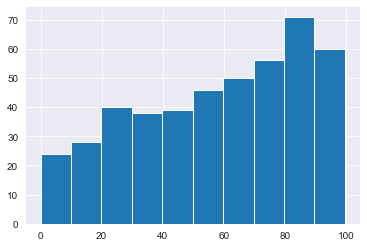

In [16]:
if_positions_summed = sum([[i*(100/len(questions[ques_key])) for i,x in enumerate(questions[ques_key]) if x=='if'] for ques_key in questions.keys()], [])
plt.hist(if_positions_summed)

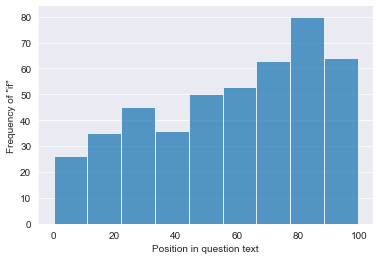

In [51]:
sns.set_style("darkgrid")

fig = sns.distplot(if_positions_summed, kde=False, hist_kws={'alpha':0.75})
fig.set(xlabel='Position in question text', ylabel='Frequency of "if"')
sns.despine()
fig.xaxis.grid(False)
plt.xticks([0,20,40,60,80,100])
plt.savefig('if.png', dpi=600)

(array([12., 15.,  6.,  6., 14.,  9., 10., 11.,  5.,  3.]),
 array([ 5.17241379, 14.48275862, 23.79310345, 33.10344828, 42.4137931 ,
        51.72413793, 61.03448276, 70.34482759, 79.65517241, 88.96551724,
        98.27586207]),
 <a list of 10 Patch objects>)

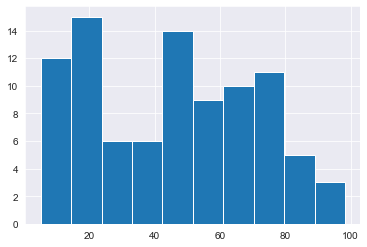

In [17]:
x_positions_summed = sum([[i*(100/len(questions[ques_key])) for i,x in enumerate(questions[ques_key]) if x=='since'] for ques_key in questions.keys()], [])
plt.hist(x_positions_summed)

# Analysing the replies 

In [31]:
# For now only the top 10 replies are read, and subreplies are left within the reply itself
replies = {}
import re
for key in answers.keys():
    replies[key] = {}
    split = re.split('-----------[-]+', answers[key])
    split = [x.replace('\n', ' ').strip() for x in split]
    split = list(filter(None, split))
    for i, reply in enumerate(split):
        replies[key][i] = reply.split()[2:]

In [32]:
replies['c1hltn']

{0: ['matt',
  'groening',
  '(',
  'creator',
  'of',
  'the',
  'simpsons',
  ')',
  'started',
  'out',
  'writing',
  'a',
  'comic',
  'strip',
  'called',
  ',',
  'i',
  'kid',
  'you',
  'not',
  ',',
  '"',
  'life',
  'in',
  'hell',
  '"',
  '.',
  'one',
  'series',
  'in',
  'the',
  'strip',
  'highlighted',
  'middle',
  'school',
  'as',
  'being',
  '"',
  'the',
  'deepest',
  'pit',
  'of',
  'hell',
  '"',
  'and',
  'high',
  'school',
  'as',
  '"',
  'the',
  'second',
  'deepest',
  'pit',
  'of',
  'hell',
  '.',
  '"',
  'not',
  'true',
  'for',
  'everybody',
  ',',
  'but',
  'probably',
  'true',
  'for',
  'about',
  '80',
  '%',
  'of',
  'people',
  '.',
  'most',
  'people',
  'are',
  'much',
  'happier',
  'the',
  'year',
  'after',
  'they',
  'get',
  'out',
  'of',
  'high',
  'school',
  'than',
  'they',
  'were',
  'while',
  'they',
  'were',
  'in',
  'it',
  '.'],
 1: ['it',
  'gets',
  'better',
  '.',
  'i',
  'hated',
  'high',
  'school

Histogram of reply length (words):
Median reply length (words): 66.0


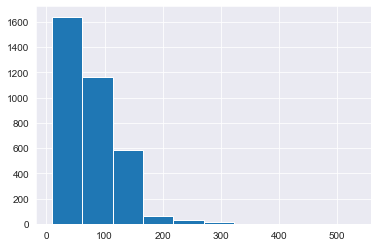

In [33]:
reply_length = {text_id:[len(rep[i]) for i in range(len(rep))] for text_id, rep in replies.items()}

print("Histogram of reply length (words):")
plt.hist(sum(reply_length.values(), []))

# print("Max reply length (words):", max(ques_length, key=ques_length.get), max(ques_length.values()))
# print("Min reply length (words):", min(ques_length, key=ques_length.get), min(ques_length.values()))
print("Median reply length (words):", np.median(sum(reply_length.values(), [])))

In [35]:
all_replies_concat = sum([[replies[rep_key][rep_num] for rep_num in replies[rep_key].keys()] for rep_key in replies.keys()], [])

In [36]:
len(all_replies_concat)

3497

(array([ 83., 121., 138., 155., 152., 151., 151., 141., 163., 140.]),
 array([ 0.62893082, 10.44103774, 20.25314465, 30.06525157, 39.87735849,
        49.68946541, 59.50157233, 69.31367925, 79.12578616, 88.93789308,
        98.75      ]),
 <a list of 10 Patch objects>)

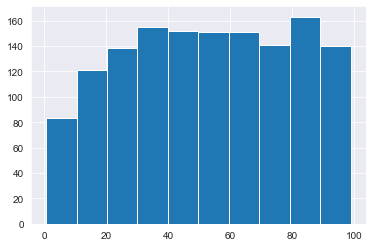

In [37]:
# Find positions of all ors in each question, normalized by 100 for comparison. Each list is concatenated to make a big list.
rep_or_positions_summed = sum([[i*(100/len(rep)) for i,x in enumerate(rep) if x=='or'] for rep in all_replies_concat], [])
plt.hist(rep_or_positions_summed)

(array([401., 587., 623., 709., 657., 638., 653., 673., 670., 506.]),
 array([ 0.        ,  9.89090909, 19.78181818, 29.67272727, 39.56363636,
        49.45454545, 59.34545455, 69.23636364, 79.12727273, 89.01818182,
        98.90909091]),
 <a list of 10 Patch objects>)

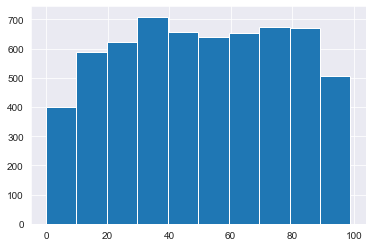

In [38]:
# Find positions of all and in each question, normalized by 100 for comparison. Each list is concatenated to make a big list.
rep_and_positions_summed = sum([[i*(100/len(rep)) for i,x in enumerate(rep) if x=='and'] for rep in all_replies_concat], [])
plt.hist(rep_and_positions_summed)

(array([131., 126., 135., 102., 107., 105., 109., 126., 145., 117.]),
 array([ 0.        ,  9.8013245 , 19.60264901, 29.40397351, 39.20529801,
        49.00662252, 58.80794702, 68.60927152, 78.41059603, 88.21192053,
        98.01324503]),
 <a list of 10 Patch objects>)

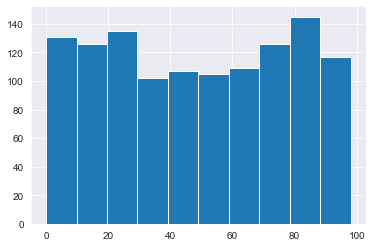

In [39]:
# Find positions of all ors in each question, normalized by 100 for comparison. Each list is concatenated to make a big list.
rep_as_positions_summed = sum([[i*(100/len(rep)) for i,x in enumerate(rep) if x=='as'] for rep in all_replies_concat], [])
plt.hist(rep_as_positions_summed)

(array([ 96.,  98., 127., 111., 127., 122., 133., 142., 132., 106.]),
 array([ 0.        ,  9.86013986, 19.72027972, 29.58041958, 39.44055944,
        49.3006993 , 59.16083916, 69.02097902, 78.88111888, 88.74125874,
        98.6013986 ]),
 <a list of 10 Patch objects>)

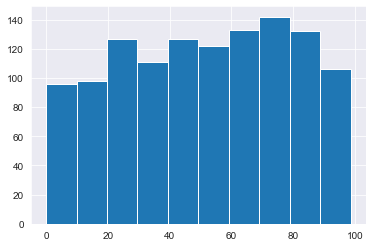

In [40]:
# Find positions of all ors in each question, normalized by 100 for comparison. Each list is concatenated to make a big list.
rep_so_positions_summed = sum([[i*(100/len(rep)) for i,x in enumerate(rep) if x=='so'] for rep in all_replies_concat], [])
plt.hist(rep_so_positions_summed)

(array([211., 165., 167., 180., 149., 182., 186., 179., 149., 124.]),
 array([ 0.        ,  9.74193548, 19.48387097, 29.22580645, 38.96774194,
        48.70967742, 58.4516129 , 68.19354839, 77.93548387, 87.67741935,
        97.41935484]),
 <a list of 10 Patch objects>)

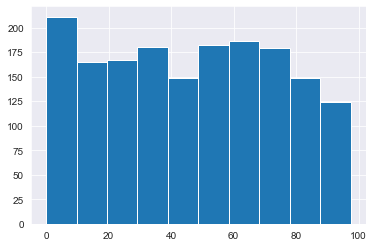

In [41]:
# Find positions of all ors in each question, normalized by 100 for comparison. Each list is concatenated to make a big list.
rep_if_positions_summed = sum([[i*(100/len(rep)) for i,x in enumerate(rep) if x=='if'] for rep in all_replies_concat], [])
plt.hist(rep_if_positions_summed)

(array([17., 17., 19., 13., 15., 10., 10., 10., 14.,  8.]),
 array([ 0.        ,  9.75308642, 19.50617284, 29.25925926, 39.01234568,
        48.7654321 , 58.51851852, 68.27160494, 78.02469136, 87.77777778,
        97.5308642 ]),
 <a list of 10 Patch objects>)

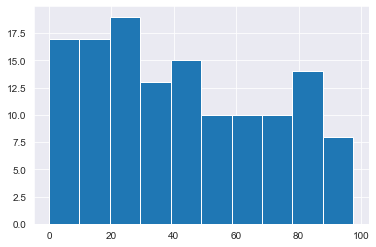

In [28]:
# Find positions of all ors in each question, normalized by 100 for comparison. Each list is concatenated to make a big list.
rep_since_positions_summed = sum([[i*(100/len(rep)) for i,x in enumerate(rep) if x=='since'] for rep in all_replies_concat], [])
plt.hist(rep_since_positions_summed)

(array([11.,  9., 10., 11., 18., 21., 18., 20., 19., 29.]),
 array([ 1.72413793, 11.47075248, 21.21736702, 30.96398157, 40.71059612,
        50.45721067, 60.20382521, 69.95043976, 79.69705431, 89.44366885,
        99.1902834 ]),
 <a list of 10 Patch objects>)

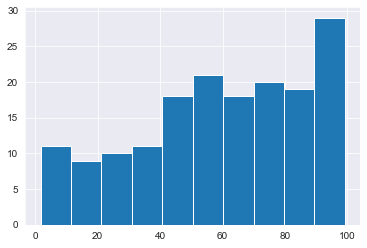

In [42]:
# Find positions of all ors in each question, normalized by 100 for comparison. Each list is concatenated to make a big list.
though_or_positions_summed = sum([[i*(100/len(rep)) for i,x in enumerate(rep) if x=='though'] for rep in all_replies_concat], [])
plt.hist(though_or_positions_summed)

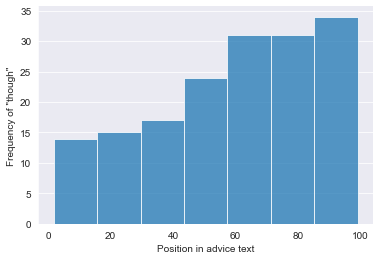

In [63]:
sns.set_style("darkgrid")

fig = sns.distplot(though_or_positions_summed, kde=False, hist_kws={'alpha':0.75})
fig.set(xlabel='Position in advice text', ylabel='Frequency of "though"')
sns.despine()
fig.xaxis.grid(False)
# plt.xticks([0,20,40,60,80,100])
plt.savefig('a-though.png', dpi=600)

In [ ]:
sns.set_style("darkgrid")

fig = sns.distplot(or_positions_summed, kde=False, hist_kws={'alpha':0.75})
fig.set(xlabel='Position in question text', ylabel='Cumulative Frequency of "though"')
sns.despine()
fig.xaxis.grid(False)
plt.xticks([0,20,40,60,80,100])
plt.savefig('or.png', dpi=600)

In [30]:
though_replies = [" ".join(rep) for rep in all_replies_concat if 'though' in rep ]

In [31]:
though_replies

['it kind of depends . if she struggling in school or life then i think you need to possibly intervene in places . if she ’s just starting to express herself the i ’d let it be . but i ’m probably on the lenient side with that stuff to begin with . listening to rebellious music or preferring her friends over family is pretty normal 13yo behavior though .',
 "just be matter of fact and she wo n't be freaked out . it 's just a bodily process . explain that a woman 's body prepares a place for a baby but if she 's not having a baby the body does n't need it , so it flows out , that 's called having your period , it happens about once a month . she 'll have a few questions , answer them . also though , one could go swimming . i do n't think you should present it to her as your period means no one could ever go swimming when they have their period . many people do .",
 "honestly though it sounds like what she needs is for her partner to take on more of the domestic load . so unless you can 

In [58]:
if_qs = [rep for rep in all_questions_str if 'if' in rep ]
if_qs

["how do you deal with a child[13f] who is hellbent on doing what she wants to do? she used to be a nice kid but now started cussing, listening to hardcore rap, prioritizing her friends over family. tried to talk to her but can't find anything. rebellious phase already? i don't know if there's something wrong or not. should i be concerned about the attitude and everything else or let her be?",
 'moms, what\'s the best way for your friends to be there for you? hi all! i\'m a 35 year old child free woman and my bestie is the same age with two kids, one is 5 and the other is just under a year old. we live in different states. when she had her first child the first year was pretty rough for her and then it evened out but with two kids it just seems to be getting harder and harder for her. we rarely get to speak on the phone anymore and when we do she has to do it while multitasking (running errands, cooking, etc.) so i don\'t think they\'re as great a chance for her to connect and express 

# Semantic and Pragmatic discourse markers 

In [32]:
because = 'because'
since = 'since'

(array([17., 17., 19., 13., 15., 10., 10., 10., 14.,  8.]),
 array([ 0.        ,  9.75308642, 19.50617284, 29.25925926, 39.01234568,
        48.7654321 , 58.51851852, 68.27160494, 78.02469136, 87.77777778,
        97.5308642 ]),
 <a list of 10 Patch objects>)

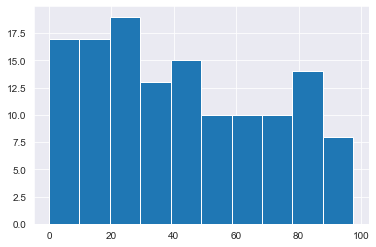

In [33]:
since_positions_summed = sum([[i*(100/len(rep)) for i,x in enumerate(rep) if x=='since'] for rep in all_replies_concat], [])
plt.hist(since_positions_summed)

(array([22., 51., 53., 60., 55., 51., 46., 50., 45., 37.]),
 array([ 0.        ,  9.61904762, 19.23809524, 28.85714286, 38.47619048,
        48.0952381 , 57.71428571, 67.33333333, 76.95238095, 86.57142857,
        96.19047619]),
 <a list of 10 Patch objects>)

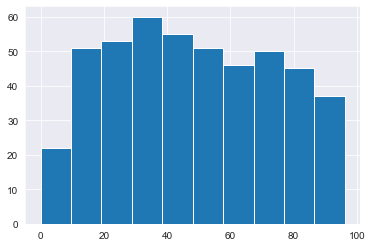

In [34]:
because_positions_summed = sum([[i*(100/len(rep)) for i,x in enumerate(rep) if x=='because'] for rep in all_replies_concat], [])
plt.hist(because_positions_summed)

In [35]:
subjective_markers = ['since', 'as a result']
objective_markers = ['for this reason']
neutral_markers = ['because']

all_replies_str = [" ".join(x) for x in all_replies_concat]

In [36]:
disc_count = {x:0 for x in (subjective_markers+objective_markers+neutral_markers)}

for sent in all_replies_str:
    for disc in disc_count.keys():
        disc_count[disc] += sent.count(disc)

([<matplotlib.axis.XTick at 0x1a1c89bbd0>,
 <a list of 4 Text xticklabel objects>)

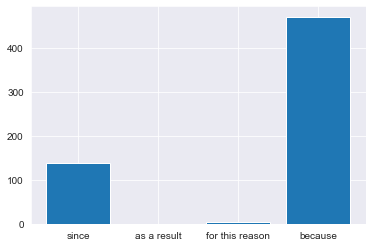

In [37]:
plt.bar([1,2,3,4], [disc_count[x] for x in disc_count.keys()])
plt.xticks([1,2,3,4], list(disc_count.keys()))

In [38]:
since_replies = [" ".join(rep) for rep in all_replies_concat if 'since' in rep ]
since_replies

["my nephew 's has been playing video games since he was old enough to use a mouse / controller and depending on the type of game he has learned a lot from it such a typing skills and spelling , money management , logic and reasoning skills , etc . as long as it 's not the sole means of entertainment and learning i do n't see what the problem is . i plan on letting my child play video games when he is old enough .",
 "my kid has been playing ever since she was able . games are n't inherently harmful",
 'i wish i had a friend like you . i really do . since you are so far away and ca nt physically help her , the emotional support you are giving her is probably the best you can do . let her vent . if she does it , you might be the closer person to her . have you tried asking her how you can help her ? may be go there for a week or she can come visit ? something like that .',
 'i bought gushers for myself since i was never allowed to have them as a kid .. i stored them on top of the fridge

In [39]:
all_questions_str = [" ".join(x) for x in questions.values()]

In [40]:
qdisc_count = {x:0 for x in (subjective_markers+objective_markers+neutral_markers)}

for sent in all_questions_str:
    for qdisc in qdisc_count.keys():
        qdisc_count[qdisc] += sent.count(qdisc)

([<matplotlib.axis.XTick at 0x1a1ca71390>,
 <a list of 4 Text xticklabel objects>)

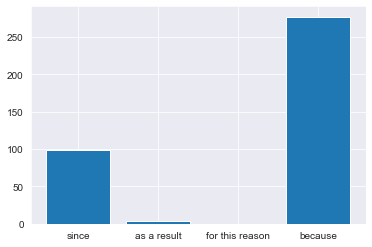

In [41]:
plt.bar([1,2,3,4], [qdisc_count[x] for x in qdisc_count.keys()])
plt.xticks([1,2,3,4], list(qdisc_count.keys()))

In [42]:
qdisc_count

{'since': 99, 'as a result': 4, 'for this reason': 0, 'because': 277}

In [43]:
disc_count

{'since': 138, 'as a result': 0, 'for this reason': 4, 'because': 471}

In [44]:
" ".join(questions['c1puni'])

'how much should i pay the babysitter? i will be returning to work shortly after being a stay at home mom for the last three years. the problem is, i have no idea what a reasonable amount is to pay a sitter. we won’t be doing a daycare since it’s only for two hours a day from monday-thursday and most daycares around me make you pay for a full day or half day despite only using a few hours of that time. so for essentially 8 hours a week for two boys- 3 and 1- what should i put up as an offer? i don’t want to lowball anyone.'

In [45]:
all_replies_str[9].replace('\\','')

'your kid is just being a kid . sit her down , tell her headphones are a must and no cursing in front of , say , grandma . teenagers are n\'t known for being the most considerate of people , so try not to assign malice to behavior that could also be explained by simple ignorance . she \'s not sitting there plotting " how can i best disrespect parent today ? ! ! " ; but rather " i am desperately trying to find my place in peer group and nobody cares about meee " . normal stuff . 13 is such an awkward age . do you remember being 13 ? it \'ll get better .'